# K-Nearest Neighbor - Iris Dataset
k-Nearest neighbors classifier assign the class of an example using the majority vote of the k most examples in the data. In this example, we apply k-nearest neighbor using the well-known <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> dataset.

First we load all the needed libraries.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, neighbors
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Next, we load the dataset that is included in the Scikit-Learn dataset module.

In [12]:
# import some data to play with
iris = datasets.load_iris()
target = np.array(iris.target)

We will use only the first two variables (sepal length and sepal width)

In [13]:
x = iris.data[:, :2]
y = iris.target

First we just evaluate the performance for k=15

In [14]:
k = 15
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn_eval = model_selection.cross_val_score(knn, x, y, cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1234))

print("%d-nearest-neighbor   Accuracy=%.3f Std=%.3f"%(k,np.average(knn_eval),np.std(knn_eval)))

15-nearest-neighbor   Accuracy=0.793 Std=0.070


Next, we perform an experiment to select the best k. For this purpose, we use the typical train-validation-test setup in which train-validation part is performed using cross validation and the final evaluation is done with the test set that was never used for selecting k.

Best k=21 Accuracy on Train=0.811 on Test=0.800


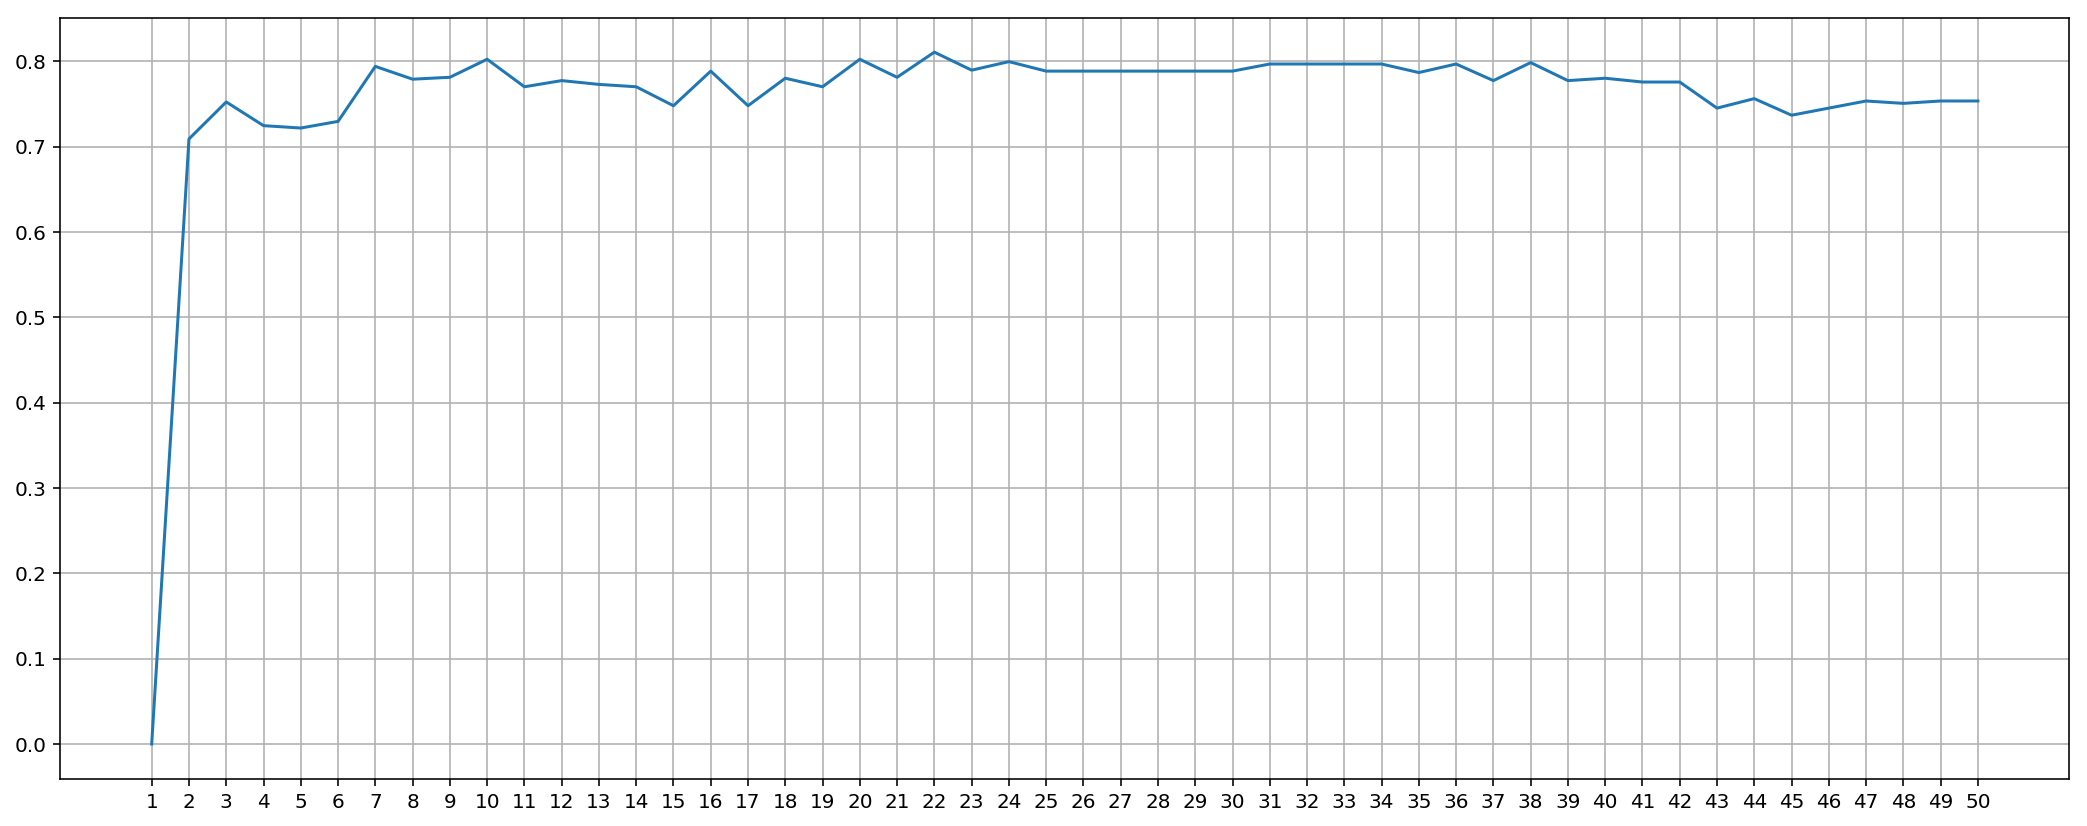

In [35]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=1234, stratify=y)

best_k = -1
best_accuracy = 0.0
max_k = 50

knn_accuracy = np.zeros(max_k)
knn_std = np.zeros(max_k)

plt.rcParams['figure.figsize'] = (18, 7)

for k in np.arange(1,max_k,1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_eval = model_selection.cross_val_score(knn, x_train, y_train, cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42))
    # print("k-nn k=%3d Accuracy=%.3f Std=%.3f"%(k,np.average(knn_eval),np.std(knn_eval)))
    knn_accuracy[k] = np.average(knn_eval)
    knn_std[k] = np.std(knn_eval)
    
    if np.average(knn_eval)>best_accuracy:
        best_accuracy = np.average(knn_eval)
        best_k = k

knn_final = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn_final = knn_final.fit(x_train, y_train)
knn_final_eval = knn_final.score(x_test, y_test)
print("Best k=%d Accuracy on Train=%.3f on Test=%.3f"%(best_k,best_accuracy,knn_final_eval))

plt.plot(range(1,max_k+1), knn_accuracy[range(0,max_k)])
plt.xticks(range(1,max_k+1))
plt.grid()


We repeat the same procedure using distance as the weight function for prediction, thus the class of more similar examples will weight more.



Best k=27 Accuracy on Train=0.787 on Test=0.760


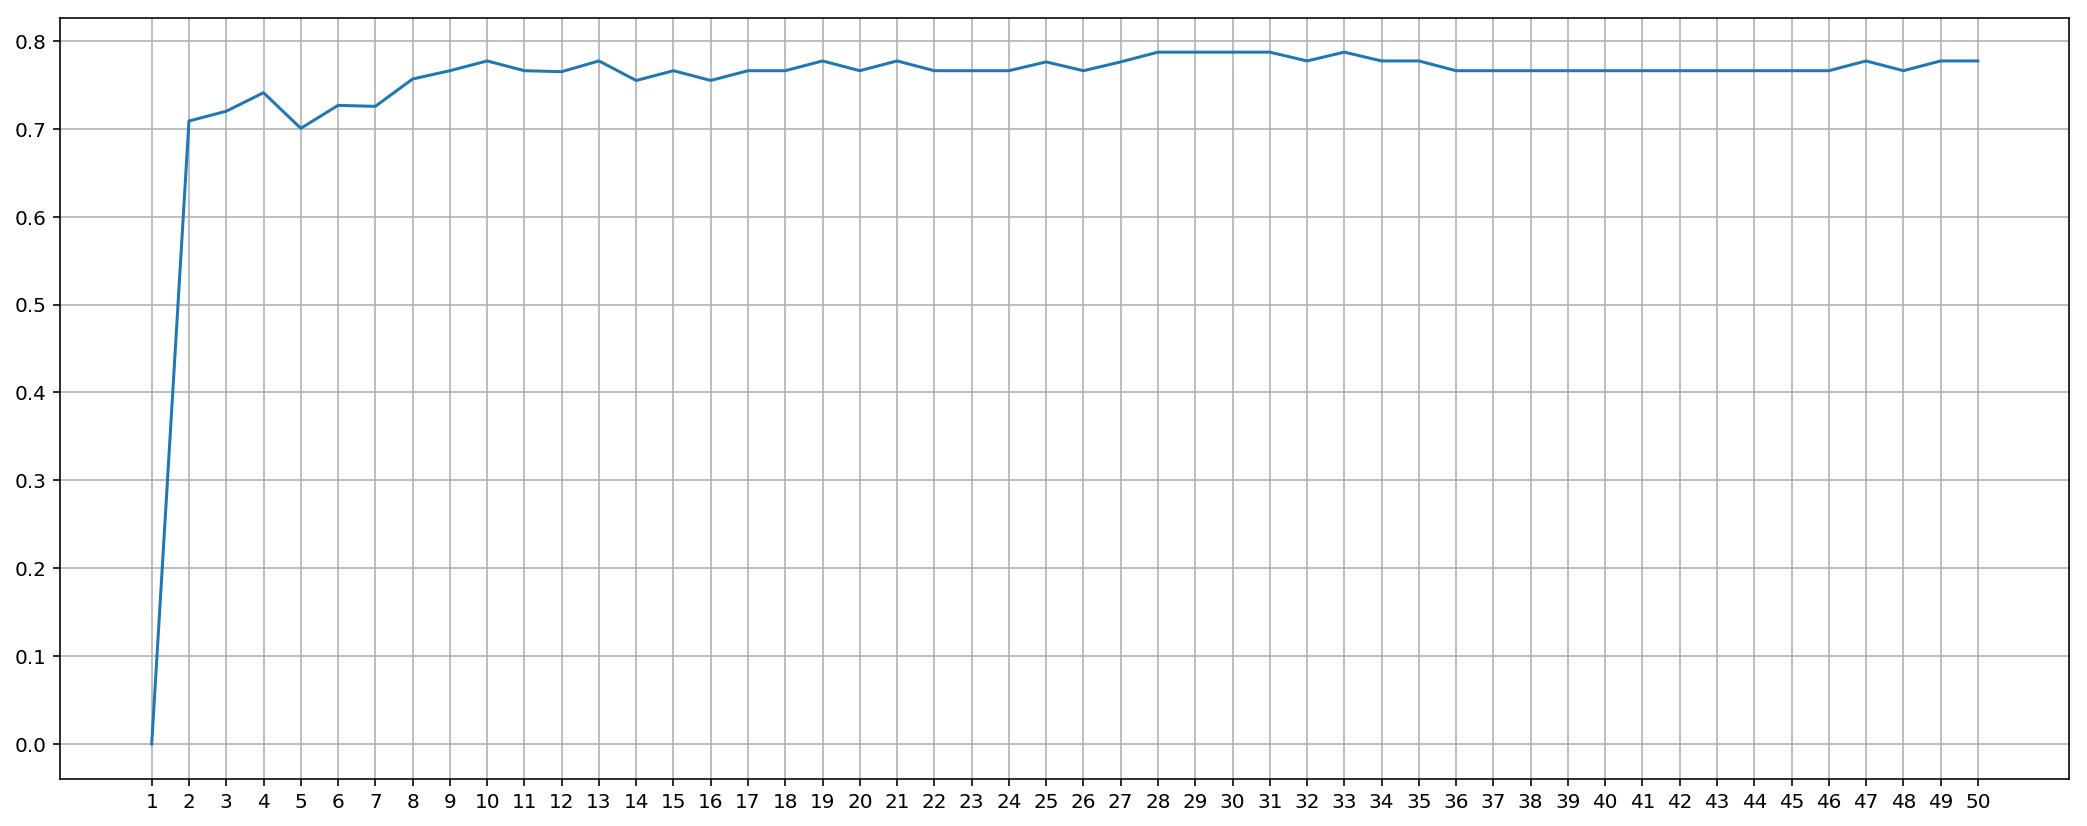

In [36]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=1234, stratify=y)

best_k = -1
best_accuracy = 0.0
max_k = 50

knn_accuracy = np.zeros(max_k)
knn_std = np.zeros(max_k)


for k in np.arange(1,max_k,1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_eval = model_selection.cross_val_score(knn, x_train, y_train, cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42))
    #print("k-nn k=%3d Accuracy=%.3f Std=%.3f"%(k,np.average(knn_eval),np.std(knn_eval)))
    knn_accuracy[k] = np.average(knn_eval)
    knn_std[k] = np.std(knn_eval)
    
    if np.average(knn_eval)>best_accuracy:
        best_accuracy = np.average(knn_eval)
        best_k = k
        
knn_final = neighbors.KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_final = knn_final.fit(x_train, y_train)
knn_final_eval = knn_final.score(x_test, y_test)
print("\n\nBest k=%d Accuracy on Train=%.3f on Test=%.3f"%(best_k,best_accuracy,knn_final_eval))

plt.plot(range(1,max_k+1), knn_accuracy[range(0,max_k)])
plt.xticks(range(1,max_k+1))
plt.grid()


Now, we want to plot the decision boundaries for Define two color maps used to show the decision boundaries generated by the classifier.

In [37]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

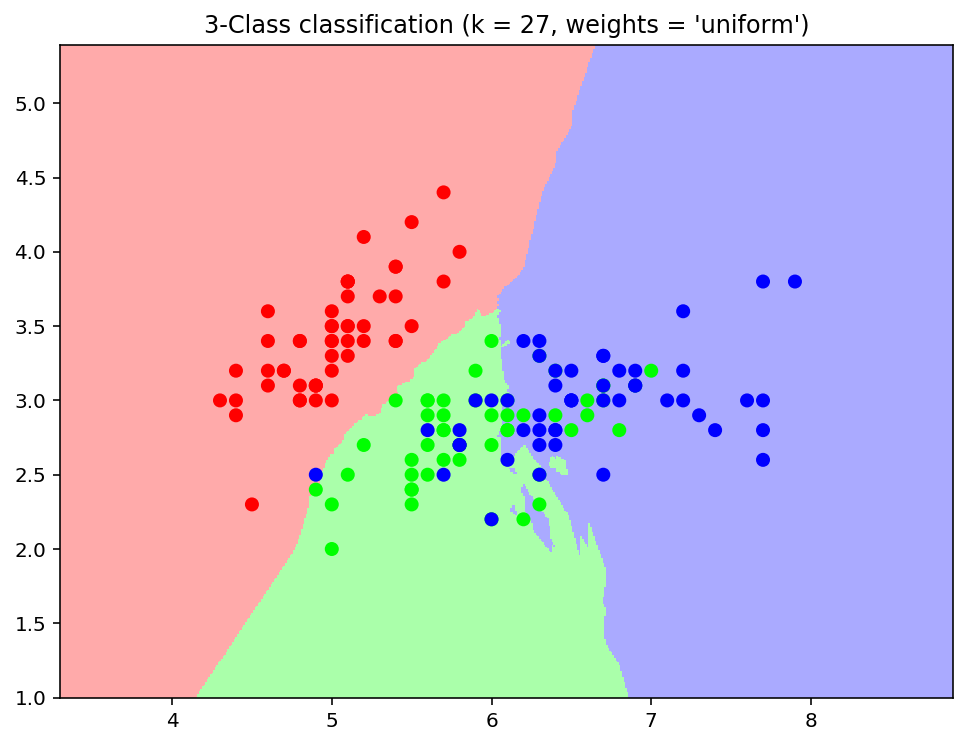

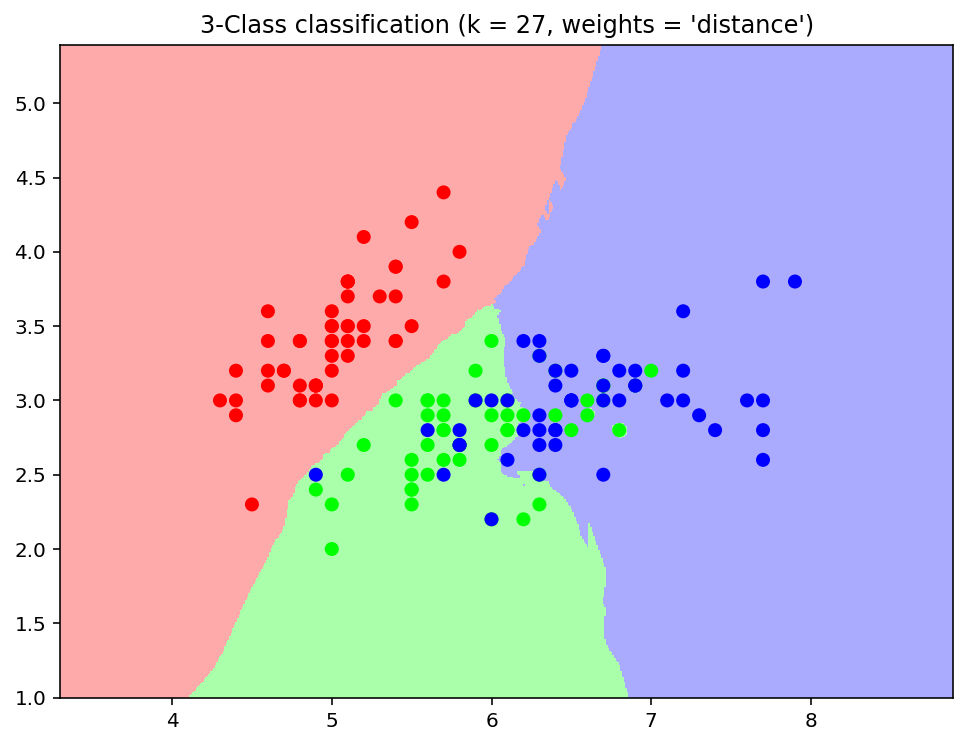

In [38]:
n_neighbors=best_k
h = 0.01
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()